

# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project,a data set of appointment records in public hospitais at Vitoria, Brazil is investigated. The reason why the patient did not shop up attracts afenion. This data sets contains records whether patients miss appointments, attributes of patients and infomation about appointments. The data set is provided Given the infomation and attributes about a patient and hisher scheduled appointment, how likely is helshe to show up to the appointment scheduled? Throughout this project, we are tring to answer this question by exploring the data set and also the connections among variables


##### and we will answer:
###### 1- Are no-show appointments associated with a certain gender?
###### 2- Does the age of patients affect the likelihood of no-show appointments?
###### 3- Do SMS reminders decrease the number of absences?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
df.h

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
## we want to know the count of columns and index
df.shape

(110527, 14)

In [4]:
## we want to check if we have a null values or not
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
## we want to check if the datatypes is well?
## and check if there any mistakes in the names of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
## from the min of 'Age' = -1, We can notice that there is an error, and it will be fixed in the next steps
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning (Here we will fix the mistakes we saw it from pervious steps)

#### cleaning the age problem

In [7]:

df[df['Age'] < 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
## drob index 99832
df.drop(99832,inplace=True)

In [9]:
## check if we solve this problem or not
df[df['Age'] < 0].shape[0]

0

#### rename the columns

In [10]:
df.rename(columns = {'No-show':'No_show'},inplace = True)

#### convert ScheduledDay and AppointmentDay from string to date time

In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Who misses appointments more, male or female?)

In [12]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

#### here we will create two data set, one for female paitents , and one for male paitents 

In [13]:
M_gender = df.query('Gender  =="M"')

In [14]:
F_gender = df.query('Gender  =="F"')

#### now we will use pie chart to see the percentage of who showed up and who is not for each gender

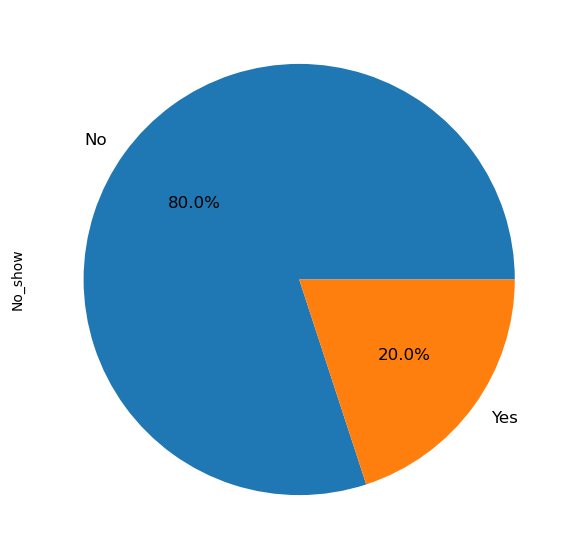

In [15]:
M_gender['No_show'].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize = 12)
plt.show()

#### we know now the percentage of who  not showed up for male gender is 20%

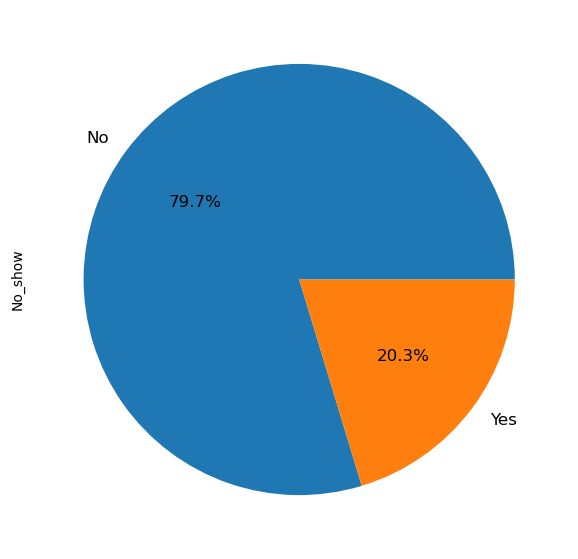

In [16]:
F_gender['No_show'].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize = 12)
plt.show()

#### Now, we know now the percentage of who not showed up for male gender is 20.3%

### So, we can notice the percentage of who not showed up for female gender is more than male gender
### but in the same time, they are very very close!!

### Research Question 2  (What is the age group that did not show up for an appointment? 0-20 or 0-40 ... or 100-120.)

#### here we will count the number of patients they did not show up for the appointments for each age group

In [17]:
age_20 =df.query('Age < 20 and No_show =="Yes" ').shape[0]
age_40 =df.query('Age < 40 and No_show =="Yes" ').shape[0]
age_60 =df.query('Age < 60 and No_show =="Yes" ').shape[0]
age_80 =df.query('Age < 80 and No_show =="Yes" ').shape[0]
age_100 =df.query('Age < 100 and No_show =="Yes" ').shape[0]
age_120 =df.query('Age < 120 and No_show =="Yes" ').shape[0]
age_arr= [age_20,age_40,age_60,age_80,age_100,age_120]


#### we will use the par chart

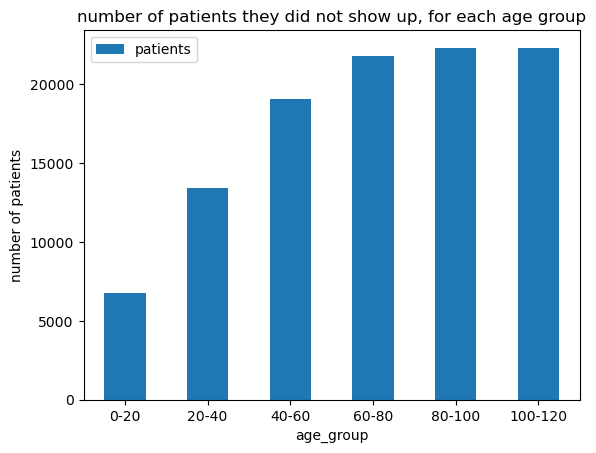

In [18]:
zz=pd.DataFrame({'age_group':["0-20", "20-40","40-60","60-80","80-100","100-120"],'patients':age_arr})
zz.plot.bar(x ='age_group',y='patients',rot=0)
plt.ylabel("number of patients")
plt.title("number of patients they did not show up, for each age group")
plt.show()

We can note that the non-attendance rate increases with age

### Research Question 3 ( Is receiving sms a factor affecting attendance at appointments? )

In [19]:
df.groupby('No_show')['SMS_received'].mean()

No_show
No     0.291337
Yes    0.438371
Name: SMS_received, dtype: float64

#### create a bar chart 

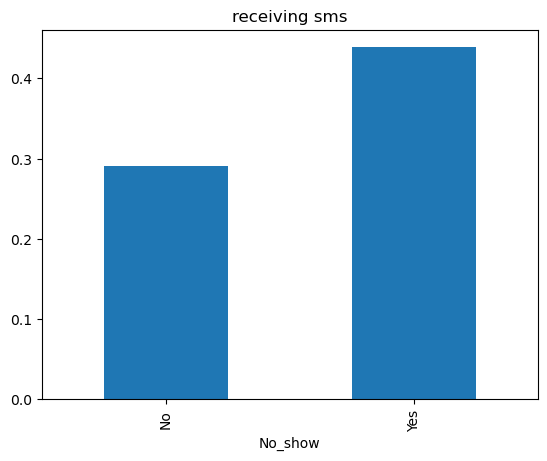

In [20]:
df.groupby('No_show')['SMS_received'].mean().plot.bar()
plt.title('receiving sms')
plt.show()

We can note that receiving messages did not reduce the non-attendance rate

<a id='conclusions'></a>
## Conclusions
Results: Our data suggest:

1-The percentage of females who did not show up for appointments is more than males, but in a very small percentage, so we cannot be certain that the gender factor may be a reason for not show up for appointments.

2-We can say that the relationship between age and non-attendance to appointments is a positive relationship, the older the patient gets the higher the possibility for him to skip his appointments.

3-The number of patients who received sms and did not show up for  their appointments is more than the number of patients who received sms and show up for their appointments, therefore, we can conclude that receiving sms is not a factor affecting whether the patient show up for his appointment or not.

Limitations:There are a couple of limitations with our data: 

1-We do not have a lot of details for certain factors to draw conclusions. For the SMS received example, the data shows that no-showers are more likely to receive an SMS. This may seem counter intuitive, but we do not have informadion on the conditions of when the SMS Is sent. For example they may target No-showers with SMS, or they may send the SMS once the Padent has not checked in 30 minutes prior to their appointment.

2-Cannot show strong correlations between factors since most of our data is categarical.